## Laba2

In [1]:
import pandas as pd
import re
import string
from pymorphy2 import MorphAnalyzer
import stop_words

%matplotlib inline
import numpy as np
from collections import Counter
import math
import nltk


In [2]:
raw_data = pd.read_excel('corpus.xlsx')

In [3]:
raw_data.head()

,sports,life,eats,news
0,Regardless of how individual performances shap...,Beverage taxes are bubbling up from the local ...,"At these Michelin-starred restaurants, you don...",Pakistan says it has shot down two Indian Air ...
1,There are 338 players invited to participate i...,"""BlacKkKlansman"" actor Topher Grace had a prod...","This cheese isn't moldy, just green in the spi...",The US House of Representatives has voted to r...
2,The 2019 NFL scouting combine officially start...,Selma Blair is sharing more details about her ...,"Getting fit is easy, they said. All you have t...",\tMPs will have their say on the next steps fo...
3,Olivia Moultrie is a 13-year-old soccer stando...,What was R. Kelly's first stop following his r...,Workouts to build muscle\nIf you want to build...,"intended return.\nTogether, they make up the S..."
4,"NASHVILLE, Tenn. — Don Garber has overseen a d...",NEW YORK (AP) — Janet Jackson is heading to La...,"I just want abs\nGood news, according to Dotso...",In a jaw dropping presidency has there ever be...


In [4]:
data = raw_data.copy()

In [5]:
data.head()

,sports,life,eats,news
0,Regardless of how individual performances shap...,Beverage taxes are bubbling up from the local ...,"At these Michelin-starred restaurants, you don...",Pakistan says it has shot down two Indian Air ...
1,There are 338 players invited to participate i...,"""BlacKkKlansman"" actor Topher Grace had a prod...","This cheese isn't moldy, just green in the spi...",The US House of Representatives has voted to r...
2,The 2019 NFL scouting combine officially start...,Selma Blair is sharing more details about her ...,"Getting fit is easy, they said. All you have t...",\tMPs will have their say on the next steps fo...
3,Olivia Moultrie is a 13-year-old soccer stando...,What was R. Kelly's first stop following his r...,Workouts to build muscle\nIf you want to build...,"intended return.\nTogether, they make up the S..."
4,"NASHVILLE, Tenn. — Don Garber has overseen a d...",NEW YORK (AP) — Janet Jackson is heading to La...,"I just want abs\nGood news, according to Dotso...",In a jaw dropping presidency has there ever be...


## предобработка

In [6]:
EXCLUDE_SYMBOLS_STR = u''.join(['№', '«', 'ђ', '°', '±', '‚', 'ћ', '‰', '…', '»', 'ѓ', 'µ', '·', 'ґ', 'њ', 'ї', 'џ', 'є', '‹',
                                '‡', '†', '¶', 'ќ', '€', '“', 'ў', '§', '„', '”', '\ufeff', '’', 'љ', '›', '•', '—', '‘', 
                                '\x7f', '\xad', '¤', '\xa0'])

In [7]:
regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
regex_dig = re.compile('[%s]' % re.escape(string.digits))
regex_symb = re.compile('[%s]' % re.escape(EXCLUDE_SYMBOLS_STR))
regex_struct = re.compile('[%s]' % string.printable + string.whitespace)
emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+")

In [8]:
for category in data.columns:
    for i, item in enumerate(data[category]):
        item = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u'', item)
        itme = re.sub(' +' , ' ', item)
        item = item.strip().strip('\t').replace('\n', u'')
        item = regex_punct.sub('', item)
        item = regex_dig.sub('', item)
        item = regex_symb.sub(' ', item)
        item = regex_struct.sub('', item)
        item = re.sub(' +' , ' ', item.strip())
        item = emoji_pattern.sub('', item)
        data.loc[i, category] = item

In [9]:
raw_data.head()

,sports,life,eats,news
0,Regardless of how individual performances shap...,Beverage taxes are bubbling up from the local ...,"At these Michelin-starred restaurants, you don...",Pakistan says it has shot down two Indian Air ...
1,There are 338 players invited to participate i...,"""BlacKkKlansman"" actor Topher Grace had a prod...","This cheese isn't moldy, just green in the spi...",The US House of Representatives has voted to r...
2,The 2019 NFL scouting combine officially start...,Selma Blair is sharing more details about her ...,"Getting fit is easy, they said. All you have t...",\tMPs will have their say on the next steps fo...
3,Olivia Moultrie is a 13-year-old soccer stando...,What was R. Kelly's first stop following his r...,Workouts to build muscle\nIf you want to build...,"intended return.\nTogether, they make up the S..."
4,"NASHVILLE, Tenn. — Don Garber has overseen a d...",NEW YORK (AP) — Janet Jackson is heading to La...,"I just want abs\nGood news, according to Dotso...",In a jaw dropping presidency has there ever be...


In [10]:
data.head()

,sports,life,eats,news
0,Regardless of how individual performances shap...,Beverage taxes are bubbling up from the local ...,At these Michelinstarred restaurants you dont ...,Pakistan says it has shot down two Indian Air ...
1,There are players invited to participate in th...,BlacKkKlansman actor Topher Grace had a produc...,This cheese isnt moldy just green in the spiri...,The US House of Representatives has voted to r...
2,The NFL scouting combine officially starts Tue...,Selma Blair is sharing more details about her ...,Getting fit is easy they said All you have to ...,MPs will have their say on the next steps for ...
3,Olivia Moultrie is a yearold soccer standout w...,What was R Kellys first stop following his rel...,Workouts to build muscleIf you want to build m...,intended returnTogether they make up the Space...
4,NASHVILLE Tenn Don Garber has overseen a drama...,NEW YORK AP Janet Jackson is heading to Las Ve...,I just want absGood news according to Dotson w...,In a jaw dropping presidency has there ever be...


In [11]:
morph = MorphAnalyzer()

In [12]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanjar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
lem = WordNetLemmatizer()

In [14]:
for category in data.columns:
        for i, item in enumerate(data[category]):
            tmp_tokens = []
            sp = item.lower().split()
            for word in sp:
                if word not in stop_words.get_stop_words('en'):
                    tmp_tokens.append(word)
            data.loc[i, category] = tmp_tokens

In [15]:
data.head()

,sports,life,eats,news
0,"[regardless, individual, performances, shape, ...","[beverage, taxes, bubbling, local, state, leve...","[michelinstarred, restaurants, dont, full, tas...","[pakistan, says, shot, two, indian, air, force..."
1,"[players, invited, participate, nfl, combine, ...","[blackkklansman, actor, topher, grace, product...","[cheese, isnt, moldy, just, green, spirit, st,...","[us, house, representatives, voted, revoke, pr..."
2,"[nfl, scouting, combine, officially, starts, t...","[selma, blair, sharing, details, struggles, mu...","[getting, fit, easy, said, work, saidbut, supp...","[mps, will, say, next, steps, brexit, later, t..."
3,"[olivia, moultrie, yearold, soccer, standout, ...","[r, kellys, first, stop, following, release, j...","[workouts, build, muscleif, want, build, muscl...","[intended, returntogether, make, spaceborne, c..."
4,"[nashville, tenn, don, garber, overseen, drama...","[new, york, ap, janet, jackson, heading, las, ...","[just, want, absgood, news, according, dotson,...","[jaw, dropping, presidency, ever, jaw, droppin..."


In [16]:
for category in data.columns:
    for i, tokens in enumerate(data[category]):
        tmp = [lem.lemmatize(word) for word in tokens]
        data.loc[i, category] = tmp

In [17]:
#lem.lemmatize("restaurants")
lem.lemmatize('said', )

'said'

In [18]:
data.head()

,sports,life,eats,news
0,"[regardless, individual, performance, shape, n...","[beverage, tax, bubbling, local, state, levelc...","[michelinstarred, restaurant, dont, full, tast...","[pakistan, say, shot, two, indian, air, force,..."
1,"[player, invited, participate, nfl, combine, p...","[blackkklansman, actor, topher, grace, product...","[cheese, isnt, moldy, just, green, spirit, st,...","[u, house, representative, voted, revoke, pres..."
2,"[nfl, scouting, combine, officially, start, tu...","[selma, blair, sharing, detail, struggle, mult...","[getting, fit, easy, said, work, saidbut, supp...","[mp, will, say, next, step, brexit, later, the..."
3,"[olivia, moultrie, yearold, soccer, standout, ...","[r, kelly, first, stop, following, release, ja...","[workout, build, muscleif, want, build, muscle...","[intended, returntogether, make, spaceborne, c..."
4,"[nashville, tenn, don, garber, overseen, drama...","[new, york, ap, janet, jackson, heading, la, v...","[just, want, absgood, news, according, dotson,...","[jaw, dropping, presidency, ever, jaw, droppin..."


### LABA4

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Составление словаря

In [22]:
import itertools
import codecs
import matplotlib.pyplot as plt

In [23]:
common_set = set()

for category in data.columns:
    common_set = common_set.union(set(itertools.chain.from_iterable(data[category])))

common_dict = {val: i for i, val in enumerate(sorted(common_set))}

In [24]:
with codecs.open("dict", "w", "utf-8") as f:
    for word, val in common_dict.items():
        f.write(u"{} -> {}\n".format(word, val))

In [25]:
#Замена слов на индексы
for category in data.columns:
    for i, item in enumerate(data[category]):
        data.loc[i, category] = u' '.join([str(common_dict[token])
                                                  for token in item])

In [26]:
data.to_excel('laba2.xlsx', encoding='utf-8')

In [27]:
import matplotlib.pyplot as plt

In [28]:
diffs = np.asarray([len(tokens) for tokens in common_dict])
print(len(diffs))

13827


In [29]:
dummy = common_dict.values()

In [31]:
common_dict

{'aa': 0,
 'aaf': 1,
 'aafhackenberg': 2,
 'aafs': 3,
 'aaliyah': 4,
 'aaliyahs': 5,
 'aaron': 6,
 'ab': 7,
 'abandon': 8,
 'abandoned': 9,
 'abandoning': 10,
 'abates': 11,
 'abbreviated': 12,
 'abc': 13,
 'abdominal': 14,
 'abduction': 15,
 'abel': 16,
 'aberdeenshire': 17,
 'abhinandanpakistans': 18,
 'abhors': 19,
 'abilene': 20,
 'ability': 21,
 'ablaze': 22,
 'able': 23,
 'abortion': 24,
 'aboutthe': 25,
 'aboyne': 26,
 'abraham': 27,
 'abramson': 28,
 'abrasive': 29,
 'abroadlocated': 30,
 'absence': 31,
 'absent': 32,
 'absgood': 33,
 'absolute': 34,
 'absolutely': 35,
 'absorb': 36,
 'absorbed': 37,
 'absorbing': 38,
 'absorbs': 39,
 'abstain': 40,
 'abubakar': 41,
 'abundance': 42,
 'abundancebiodiversity': 43,
 'aburi': 44,
 'abuse': 45,
 'abused': 46,
 'abusekelly': 47,
 'abuseshowever': 48,
 'abusing': 49,
 'abusive': 50,
 'academic': 51,
 'academy': 52,
 'acadia': 53,
 'acc': 54,
 'accelerate': 55,
 'accent': 56,
 'accept': 57,
 'acceptablea': 58,
 'acceptance': 59,
 'acc

In [43]:
new_dummy = []
for i in dummy:
    new_dummy.append(i)

In [44]:
new_dummy

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [30]:
for t in common_dict:
    print(t, len(t))
    break

aa 2


In [33]:
print(len('abhinandanpakistans'))

19


In [34]:
len(common_dict)

13827

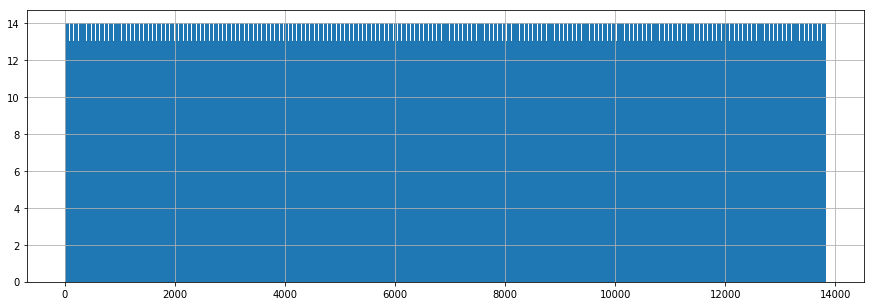

In [48]:
plt.figure(figsize=(15, 5))
plt.hist(new_dummy, bins=1000)
plt.grid(True)
#plt.xlim(0, 30)

In [27]:
new_diffs = diffs[diffs >= 3]

In [28]:
new_diffs

array([ 3, 13,  4, ...,  7,  4,  3])

In [29]:
common_dict

{'aa': 0,
 'aaf': 1,
 'aafhackenberg': 2,
 'aafs': 3,
 'aaliyah': 4,
 'aaliyahs': 5,
 'aaron': 6,
 'ab': 7,
 'abandon': 8,
 'abandoned': 9,
 'abandoning': 10,
 'abates': 11,
 'abbreviated': 12,
 'abc': 13,
 'abdominal': 14,
 'abduction': 15,
 'abel': 16,
 'aberdeenshire': 17,
 'abhinandanpakistans': 18,
 'abhors': 19,
 'abilene': 20,
 'ability': 21,
 'ablaze': 22,
 'able': 23,
 'abortion': 24,
 'aboutthe': 25,
 'aboyne': 26,
 'abraham': 27,
 'abramson': 28,
 'abrasive': 29,
 'abroadlocated': 30,
 'absence': 31,
 'absent': 32,
 'absgood': 33,
 'absolute': 34,
 'absolutely': 35,
 'absorb': 36,
 'absorbed': 37,
 'absorbing': 38,
 'absorbs': 39,
 'abstain': 40,
 'abubakar': 41,
 'abundance': 42,
 'abundancebiodiversity': 43,
 'aburi': 44,
 'abuse': 45,
 'abused': 46,
 'abusekelly': 47,
 'abuseshowever': 48,
 'abusing': 49,
 'abusive': 50,
 'academic': 51,
 'academy': 52,
 'acadia': 53,
 'acc': 54,
 'accelerate': 55,
 'accent': 56,
 'accept': 57,
 'acceptablea': 58,
 'acceptance': 59,
 'acc